# Build a machine learning model

The New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work we have done and has requested that we build a machine learning model to predict if a customer will not leave a tip or not. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

  

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  


*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps


## PACE: Plan
**Question 1:**
  What are we being asked to do?
  
**Answer:**
Predict if a customer will **not** leave a tip.

**Question 2:**
  What are the ethical implications of the model? What are the consequences of our model making errors?
  
**Answer:**
Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app.
Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra.

**Question 3:**
   Do the benefits of such a model outweigh the potential problems?
   
**Answer:**   
It's not good to disincentivize drivers from picking up customers. It could also cause a customer backlash. The problems seem to outweigh the benefits.

**Question 4:**
   Should we proceed with the request to build this model? Why or why not?
   
**Answer:** 
No. Effectively limiting equal access to taxis is ethically problematic, and carries a lot of risk.

**Question 5:**
  Can the objective be modified to make it less problematic?
  
**Answer:**
We can build a model that predicts the most generous customers. This could accomplish the goal of helping taxi drivers increase their earnings from tips while preventing the wrongful exclusion of certain people from using taxis.

##### Suppose we were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

**Question 1:**  What features do we need to make this prediction?

**Answer**
Ideally, we'd have behavioral history for each customer, so we could know how much they tipped on previous taxi rides. We'd also want times, dates, and locations of both pickups and dropoffs, estimated fares, and payment method.

**Question 2:**  What would be the target variable?

**Answer**
The target variable would be a binary variable (1 or 0) that indicates whether or not the customer is expected to tip ≥ 20%.


### Note:
This is a supervised learning, classification task. We could use accuracy, precision, recall, F-score, area under the ROC curve, or a number of other metrics. However, we don't have enough information at this time to know which are most appropriate. We need to know the class balance of the target variable.

In [1]:
# Import operational packages.
import numpy as np
import pandas as pd

# Import visualization package.
import matplotlib.pyplot as plt

# Import modelling packages.
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

In [2]:
# Load dataset into dataframe
df0 = pd.read_csv(r'C:\Users\user\Desktop\2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous notebook
nyc_preds_means = pd.read_csv(r'C:\Users\user\Desktop\Course 6\pickle and results\nyc_preds_means.csv')

In [3]:
# Inspect first few rows of df0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
# Inspect first few rows of nyc_means
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


**Join the two dataframes**

In [6]:
# Merge datasets
df0 =df0.merge(nyc_preds_means, left_index= True, right_index= True)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration_x,mean_distance_x,predicted_fare_x,mean_duration_y,mean_distance_y,predicted_fare_y
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642,14.616667,4.435000,15.845642


In [7]:
df0.shape

(22699, 24)

## PACE: **Analyze**



### **Task 2. Feature engineering**

Call `info()` on the dataframe.

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

We know from EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, we'll need to sample the data to select only the customers who pay with credit card. 

Copy `df1` and assign the result to a variable called `df2`. Then, use a Boolean mask to filter `df2` so it contains only customers who paid with credit card.

In [9]:
# Subset the data to isolate only customers who paid by credit card
df1 = df0[df0['payment_type']==1]

In [10]:
df1.shape

(15265, 24)

In [11]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration_x,mean_distance_x,predicted_fare_x,mean_duration_y,mean_distance_y,predicted_fare_y
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,30.250000,3.700000,18.731650
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,11.855376,2.052258,10.441351


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what is needed to create the target variable. We'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation: 

$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [ ]:
# Create tip % col
df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])

In [15]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,mean_duration_x,mean_distance_x,predicted_fare_x,mean_duration_y,mean_distance_y,predicted_fare_y,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,0.0,0.3,16.56,22.847222,3.521667,16.434245,22.847222,3.521667,16.434245,0.200000
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,0.0,0.3,20.80,24.470370,3.108889,16.052218,24.470370,3.108889,16.052218,0.238095
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.250000,0.881429,7.053706,7.250000,0.881429,7.053706,0.198630
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,3.700000,18.731650,30.250000,3.700000,18.731650,0.300000
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,0.0,0.3,12.36,11.855376,2.052258,10.441351,11.855376,2.052258,10.441351,0.200000


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [ ]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

In [17]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,mean_duration_x,mean_distance_x,predicted_fare_x,mean_duration_y,mean_distance_y,predicted_fare_y,tip_percent,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,0.3,16.56,22.847222,3.521667,16.434245,22.847222,3.521667,16.434245,0.200000,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,0.3,20.80,24.470370,3.108889,16.052218,24.470370,3.108889,16.052218,0.238095,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,0.3,8.75,7.250000,0.881429,7.053706,7.250000,0.881429,7.053706,0.198630,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,0.3,27.69,30.250000,3.700000,18.731650,30.250000,3.700000,18.731650,0.300000,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,0.3,12.36,11.855376,2.052258,10.441351,11.855376,2.052258,10.441351,0.200000,1


##### Create day column

In [17]:
import datetime

In [ ]:
# Convert pickup and dropoff cols to datetime

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime']= pd.to_datetime(df1['tpep_dropoff_datetime'], format= '%m/%d/%Y %I:%M:%S %p')
df1.head()

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase. We will not be doing same for `dropoff_datetime` because it is safe to assume that we had them picked up and dropped off the same day

In [ ]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

#### Create time of day columns

Next, engineer four new columns that represent time of day. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [ ]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [36]:
df2.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,22.847222,3.521667,16.434245,0.200000,1,saturday,8,8,8,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,24.470370,3.108889,16.052218,0.238095,1,tuesday,14,14,14,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,7.250000,0.881429,7.053706,0.198630,0,friday,7,7,7,7


We'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [22]:
# Define 'am_rush()' conversion function [from 06:00-10:00]
def am_rush(hour):
    if 6 <= hour['am_rush'] <10:
        val= 1
    else:
            val= 0
    return val

In [ ]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)

In [25]:
df1['am_rush'].head(5)

0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

In [26]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [ ]:
# Apply 'daytime' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

In [30]:
#Define'pm_rush()' conversion function [16:00–20:00]
def pm_rush(hour):
    if 16<= hour['pm_rush'] <20:
        val= 1
    else:
        val= 0
    return val

In [ ]:
# Apply 'pm_rush' function to the 'pm_rush' series
df1['pm_rush']= df1.apply(daytime, axis= 1)

In [32]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [ ]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

#### Create month column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [ ]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [35]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mean_distance_y,predicted_fare_y,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,3.521667,16.434245,0.200000,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,3.108889,16.052218,0.238095,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.881429,7.053706,0.198630,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,3.700000,18.731650,0.300000,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,2.052258,10.441351,0.200000,1,saturday,0,0,0,1,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [36]:
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VendorID          15265 non-null  int64  
 1   passenger_count   15265 non-null  int64  
 2   RatecodeID        15265 non-null  int64  
 3   PULocationID      15265 non-null  int64  
 4   DOLocationID      15265 non-null  int64  
 5   mean_duration_x   15265 non-null  float64
 6   mean_distance_x   15265 non-null  float64
 7   predicted_fare_x  15265 non-null  float64
 8   mean_duration_y   15265 non-null  float64
 9   mean_distance_y   15265 non-null  float64
 10  predicted_fare_y  15265 non-null  float64
 11  generous          15265 non-null  int32  
 12  day               15265 non-null  object 
 13  am_rush           15265 non-null  int64  
 14  daytime           15265 non-null  int64  
 15  pm_rush           15265 non-null  int64  
 16  nighttime         15265 non-null  int64 

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, we'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [38]:
# 1. Define list of cols to convert to string
col_to_str= ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in col_to_str:
    df1[col]= df1[col].astype('str')

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [40]:
df2= pd.get_dummies(df1, drop_first= True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 350 entries, passenger_count to month_sep
dtypes: float64(6), int32(1), int64(5), uint8(338)
memory usage: 6.4 MB


## Deciding evaluation metric

In [43]:
# Display the number of individual values present in outcome variable
df2['generous'].value_counts()

0    9944
1    5321
Name: generous, dtype: int64

In [44]:
# Display the percentage of individual values present in outcome variable
df2['generous'].value_counts(normalize= True)*100

0    65.142483
1    34.857517
Name: generous, dtype: float64

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. We want to help taxi drivers make more money, but we don't want this to anger customers. The metric should weigh both precision and recall equally.**

  F<sub>1</sub> score is the metric that places equal weight on true postives and false positives, also on precision and recall


## PACE: **Construct**


##### **Split the data**

Now we're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [45]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop('generous', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. Here, there is a tradeoff between tuming more hyperparameters and a good runtime.
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric we want to use to select the model (`refit=_`)


In [52]:
# 1. Instantiate the random forest classifier
rf= RandomForestClassifier(random_state= 42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params= {'max_depth': [4,5,6,7,8], 
             'max_features': [1,2,3],
             'max_samples': [0.7,0.8,0.9],
             'min_samples_leaf': [1,2,3,4,5],
            'min_samples_split': [2,3,4,],
             'n_estimators': [75, 100, 125]
           } 

# 3. Define a dictionary of scoring metrics to capture
scoring= {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

   Now, fit the data to the training set

In [54]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [55]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 9min 2s
Wall time: 11min 43s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring={'recall', 'accuracy', 'precision', 'f1'})

In [56]:
# Examine the best score
rf1.best_score_

0.3409745313819773

In [57]:
#Examine the best combination of hyperparameters.
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

#### Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [61]:
def make_results(RF_tests:str, model_object, metric:str):
    '''
    Arguments:
    RF_tests (string): what we want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [RF_tests],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

A model with such low F<sub>1</sub>, precision, and recall scores is not good enough.


For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.


Use the model to predict on the test data. Assign the results to a variable called `preds`.


The benefit of using multiple models to predict on the test data is that we can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fit the training data.

The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, we no longer have a truly unbiased idea of how the model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" a model.

In [62]:
# Get scores on test data
preds = rf1.best_estimator_.predict(X_test)

##### **XGBoost**

 Try to improve the scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [66]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [67]:
%%time
xgb1.fit(X_train, y_train)

CPU times: total: 15min 18s
Wall time: 9min 14s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring={'recall', 'accuracy', 'precision', 'f1'})

### Plot a confusion matrix of the model's predictions on the test data.

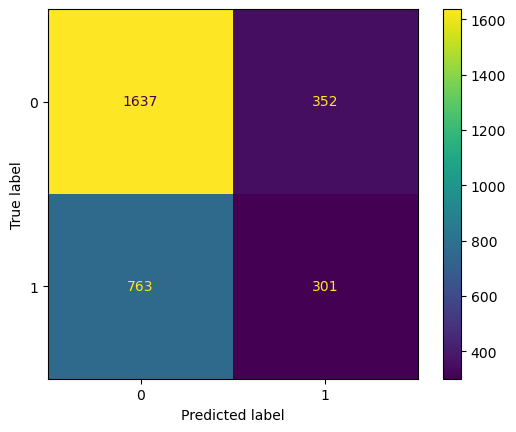

In [68]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_)
disp.plot();

### Quick Insight

The model is twice as likely to predict a false negative than it is to predict a false positive. Therefore, type II errors are more common. For our use case, this would be more desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one. However, it's unlikely that this model would be deployed without further development to significantly improve its performance.

##### Feature importance

Use the `plot_importance` function to inspect the top 10 most important features of your final model.

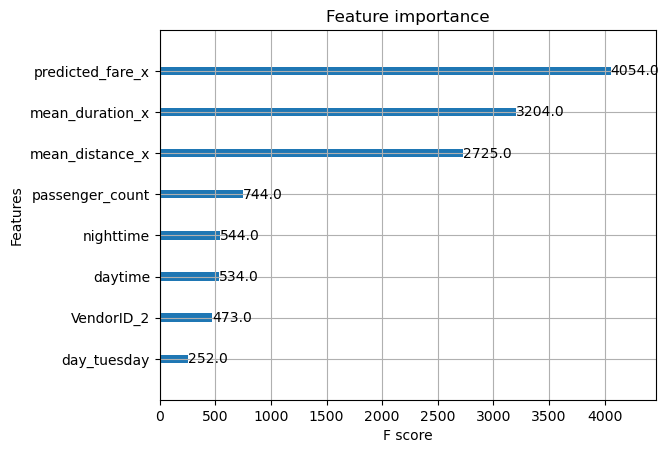

In [69]:
plot_importance(xgb1.best_estimator_, max_num_features=8);


## PACE: **Execute**


### **Conclusion**

In this step, we will use the results of the models above to formulate a conclusion. Considering the following questions:

1. **Would we recommend using this model? Why or why not?**  
This is not a great model, but depending on how it's used it could still be useful. If the objective is only to help give taxi drivers a better idea of whether someone will leave a good tip, then it could be useful. It may be worthwhile to test it with a select group of taxi drivers to get feedback.

2. **What was the highest scoring model?**   
Unfortunately, XGBoost is not the most transparent machine learning algorithm. We know that `predicted_fare`, `mean_duration`, and `mean_distance` are the most important features, but we don't know how they influence tipping. This would require further exploration.

3. **Are there new features that we can engineer that might improve model performance?**   
In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far.


4. **What features would we want to have that would likely improve the performance of the model?**   
It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash.
It would be helpful to have a lot more data. With enough data, we could create a unique feature for each pickup/dropoff combination.